In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)

In [21]:
!pip install ISLP

  Using cached ISLP-0.4.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
  Using cached pygam-0.9.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached autograd-1.7.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-1.0.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached progressbar2-4.5.0-py3-none-any.whl.metadata (16 kB)
  Using cached scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
Using cached ISLP-0.4.0-py3-none-any.whl (3.6 MB)
Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl (3.8 MB)
Using cached pygam-0.9.1-py3-none-any.whl (522 kB)
Using cached scipy-1.11.4-cp312-cp312-win_amd64.whl (43.7 MB)
Using cached pytorch_lightning-2.4.0-py3-none-any.wh

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
train = pd.read_csv('.\\train.csv',index_col= 'id')
test = pd.read_csv('.\\test.csv',index_col= 'id')

In [5]:
col  = train.columns
train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                             
0      2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1      3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2      4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3      2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4      3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
...       ...       ...       ...        ...         ...       ...       ...   
37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222     34.19   
37133  3.7308      26.0  5.087533   0.966019      1006.0  4.316901     37.32   
37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734     37.75   
37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659     38.40   
37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065     36.34   

       Longitude  MedHouseVal  
id                             
0        -120.12        0.980  
1        -121.22        0.946  
2        -120.45        1.576  
3        -117.09        1.336  
4        -122.41        4.500  
...          ...          ...  
37132    -118.36        1.856  
37133    -121.86        1.588  
37134    -122.44        3.387  
37135    -120.98        1.592  
37136    -119.64        0.652  

[37137 rows x 9 columns]

In [6]:
train.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  37137.000000  37137.000000  37137.000000  37137.000000  37137.000000   
mean       3.851029     26.057005      5.163124      1.062204   1660.778919   
std        1.803167     12.158221      1.206242      0.096490   1302.469608   
min        0.499900      2.000000      0.851064      0.500000      3.000000   
25%        2.602300     17.000000      4.357522      1.020305    952.000000   
50%        3.515600     25.000000      5.068611      1.054545   1383.000000   
75%        4.699700     35.000000      5.858597      1.088825   1856.000000   
max       15.000100     52.000000     28.837607      5.873181  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  37137.000000  37137.000000  37137.000000  37137.000000  
mean       2.831243     35.570030   -119.554329      2.079751  
std        2.702413      2.083179      1.974028      1.158571  
min        0.950000     32.550000   -124.350000      0.149990  
25%        2.394495     33.930000   -121.800000      1.208000  
50%        2.744828     34.190000   -118.450000      1.808000  
75%        3.125313     37.700000   -118.020000      2.660000  
max      502.990610     41.950000   -114.550000      5.000010

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-null  float64
 5   AveOccup     37137 non-null  float64
 6   Latitude     37137 non-null  float64
 7   Longitude    37137 non-null  float64
 8   MedHouseVal  37137 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [8]:
train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                             
0      2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1      3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2      4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3      2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4      3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
...       ...       ...       ...        ...         ...       ...       ...   
37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222     34.19   
37133  3.7308      26.0  5.087533   0.966019      1006.0  4.316901     37.32   
37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734     37.75   
37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659     38.40   
37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065     36.34   

       Longitude  MedHouseVal  
id                             
0        -120.12        0.980  
1        -121.22        0.946  
2        -120.45        1.576  
3        -117.09        1.336  
4        -122.41        4.500  
...          ...          ...  
37132    -118.36        1.856  
37133    -121.86        1.588  
37134    -122.44        3.387  
37135    -120.98        1.592  
37136    -119.64        0.652  

[37137 rows x 9 columns]

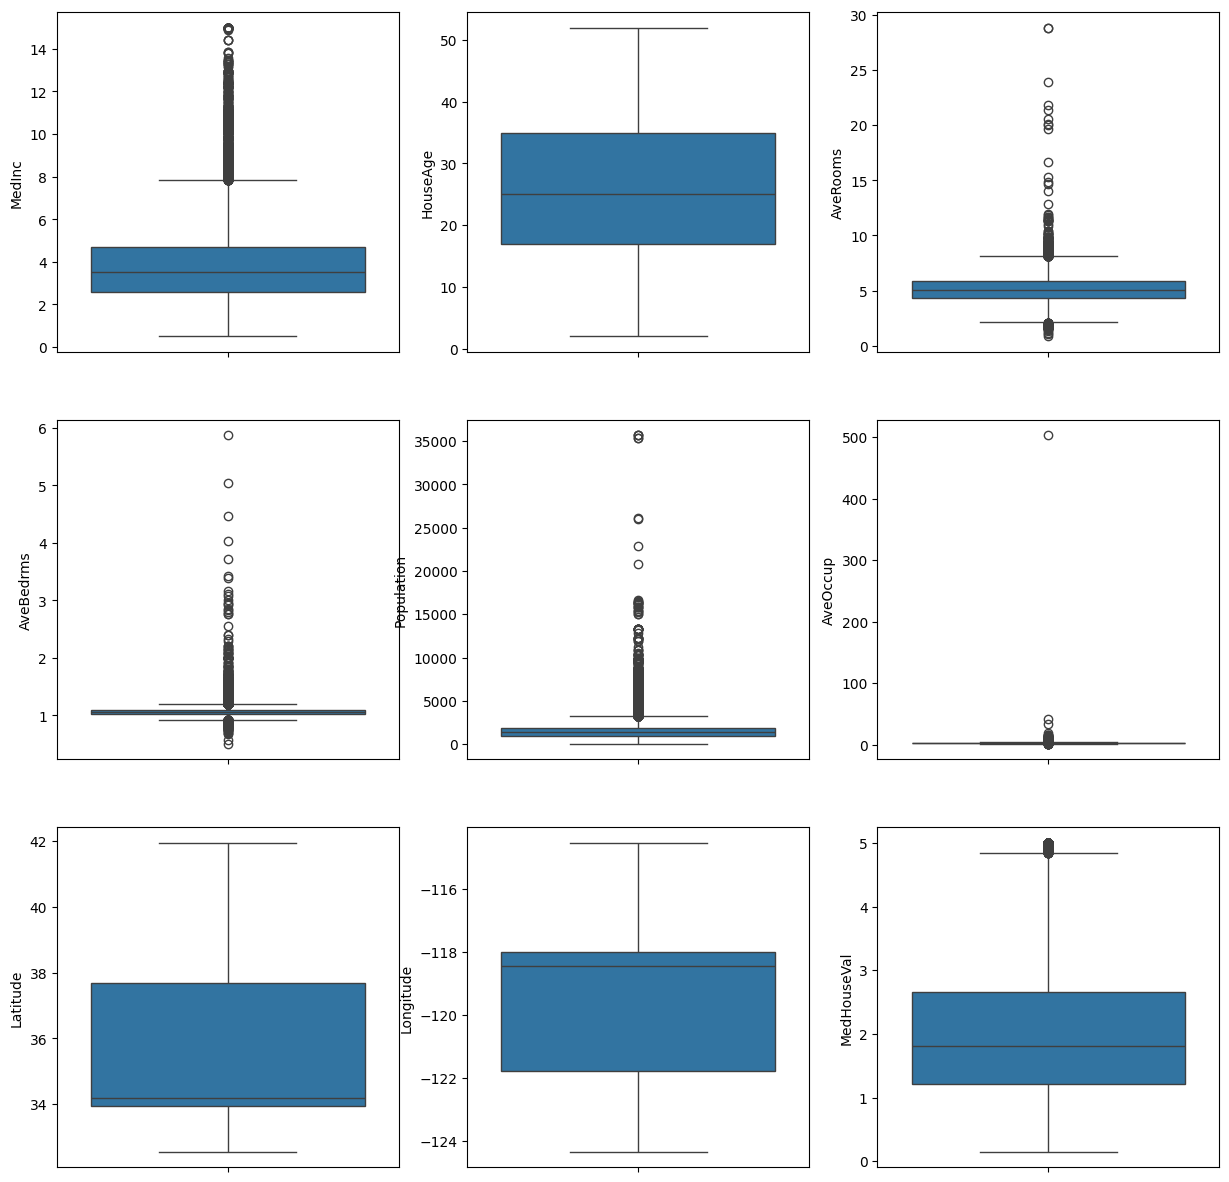

In [9]:
plt.figure(figsize=(15,15))
for i,colu in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.boxplot(train[colu])

In [10]:
train = pd.read_csv('.\\train.csv',index_col= 'id')
def remove_outlier(col:str,df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df[col]

for i in col:
    if i not in ["Latitude","Longitude"]:
        train[i] = remove_outlier(i,train)
train.dropna()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                             
0      2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1      3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2      4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3      2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4      3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
...       ...       ...       ...        ...         ...       ...       ...   
37131  2.6913      17.0  3.492991   1.093207      1135.0  2.573770     34.20   
37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222     34.19   
37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734     37.75   
37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659     38.40   
37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065     36.34   

       Longitude  MedHouseVal  
id                             
0        -120.12        0.980  
1        -121.22        0.946  
2        -120.45        1.576  
3        -117.09        1.336  
4        -122.41        4.500  
...          ...          ...  
37131    -118.48        2.063  
37132    -118.36        1.856  
37134    -122.44        3.387  
37135    -120.98        1.592  
37136    -119.64        0.652  

[29631 rows x 9 columns]

In [11]:
train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                             
0      2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1      3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2      4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3      2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4      3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
...       ...       ...       ...        ...         ...       ...       ...   
37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222     34.19   
37133  3.7308      26.0  5.087533   0.966019      1006.0       NaN     37.32   
37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734     37.75   
37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659     38.40   
37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065     36.34   

       Longitude  MedHouseVal  
id                             
0        -120.12        0.980  
1        -121.22        0.946  
2        -120.45        1.576  
3        -117.09        1.336  
4        -122.41        4.500  
...          ...          ...  
37132    -118.36        1.856  
37133    -121.86        1.588  
37134    -122.44        3.387  
37135    -120.98        1.592  
37136    -119.64        0.652  

[37137 rows x 9 columns]

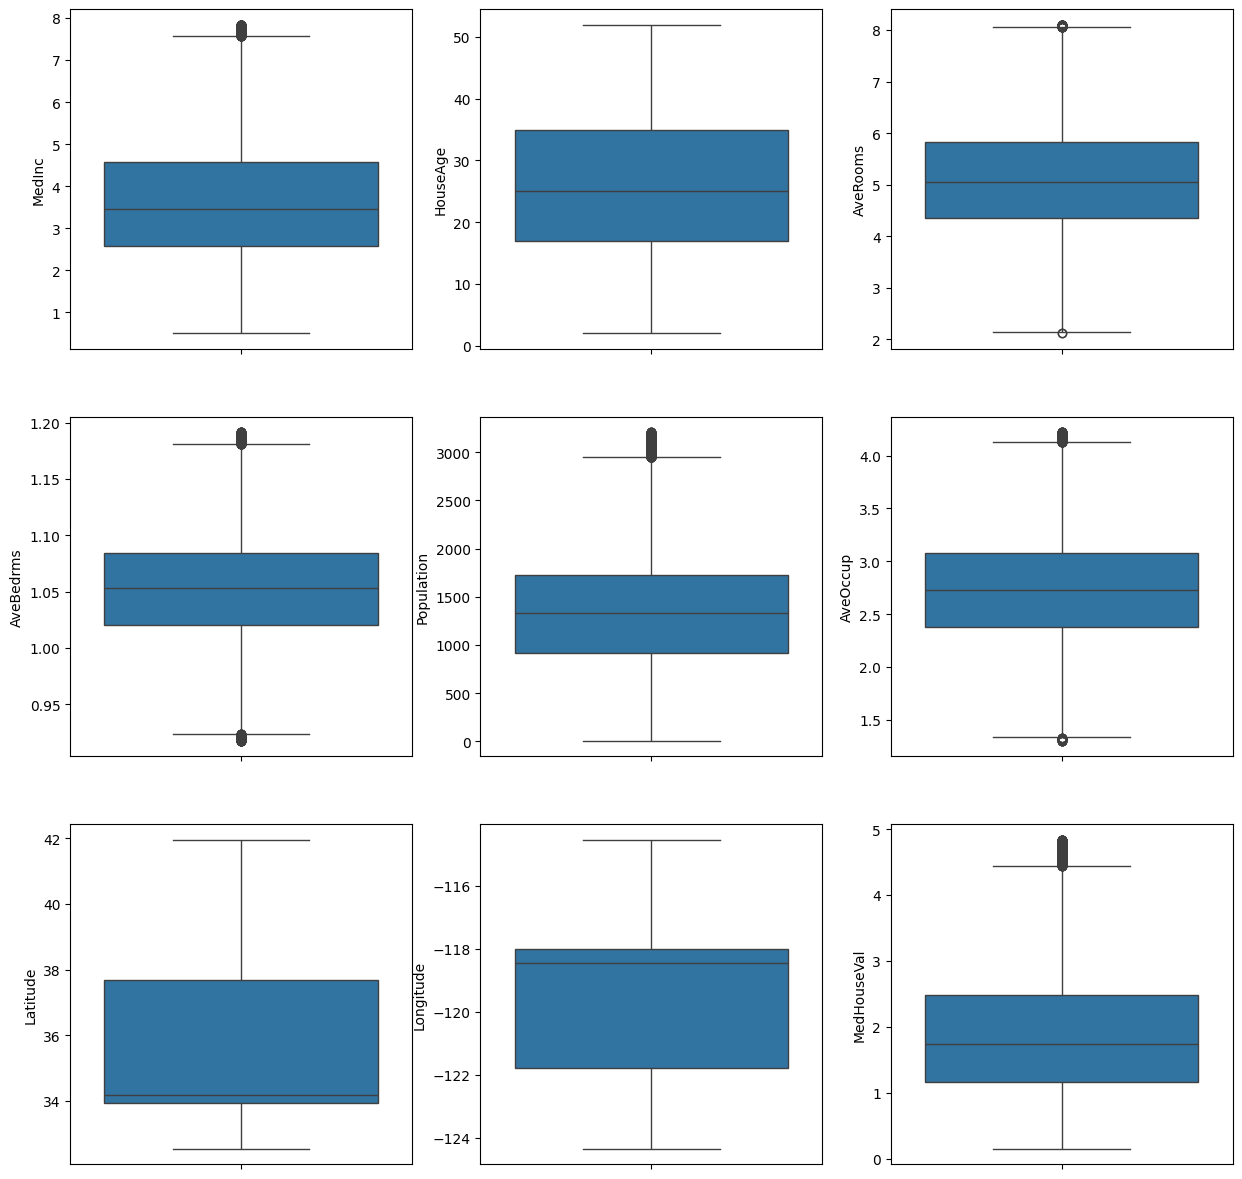

In [12]:
plt.figure(figsize=(15,15))
for i,colu in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.boxplot(train[colu])

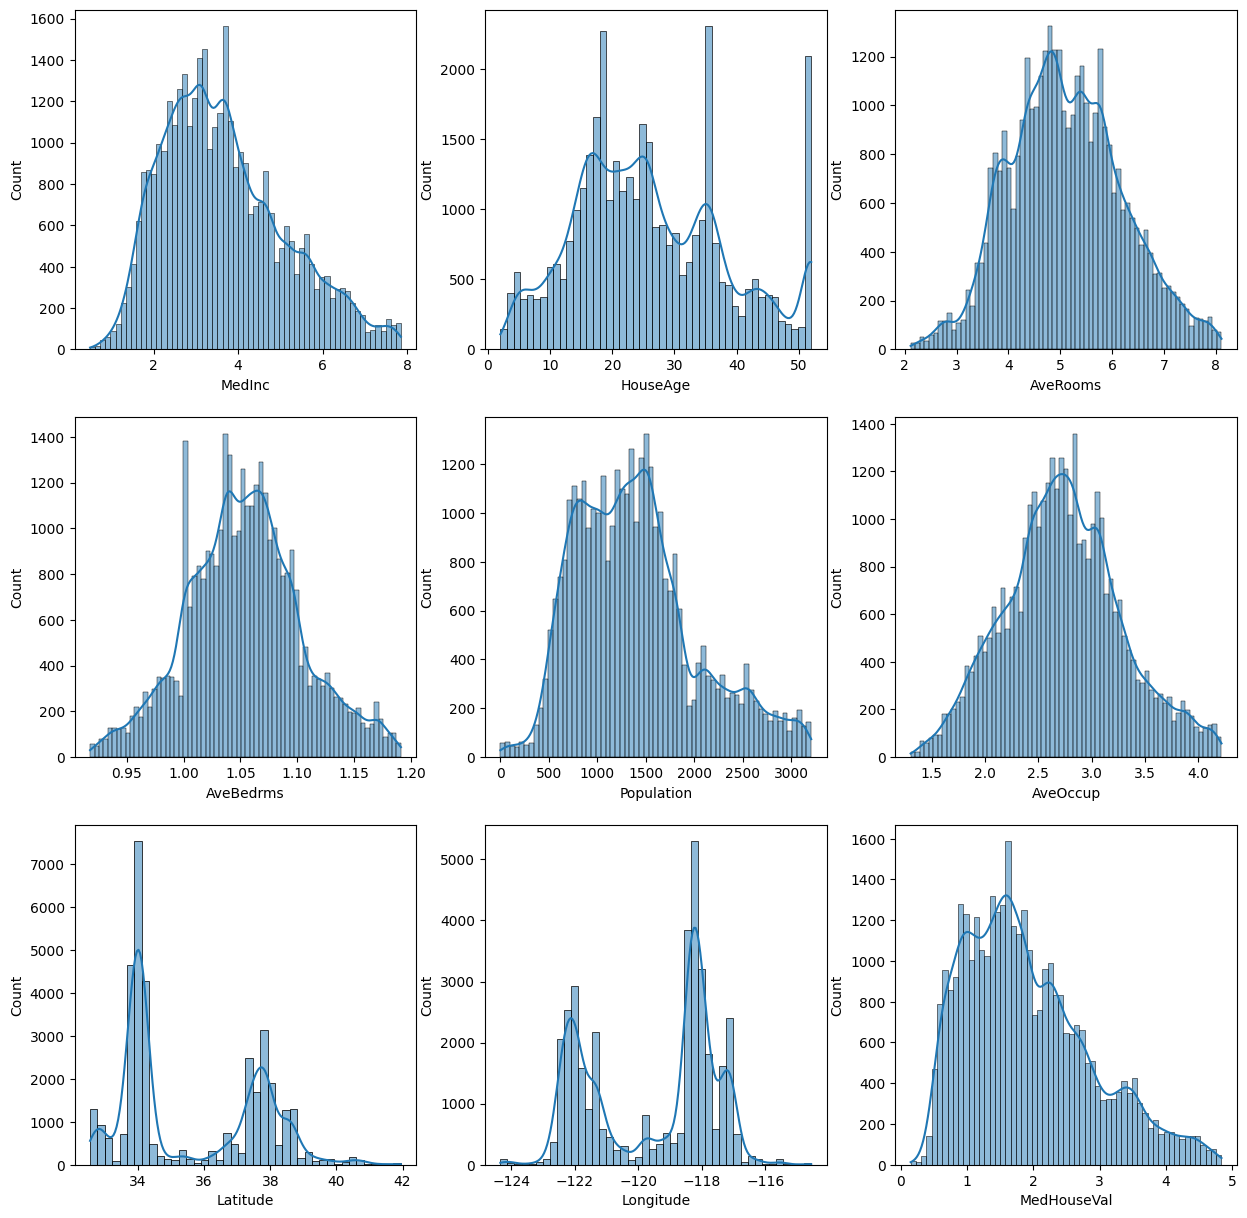

In [13]:
plt.figure(figsize=(15,15))
for i,colu in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.histplot(train[colu], kde=True)

In [14]:
# train['MedInc'] = np.log(train['MedInc'])
# train['AveBedrms'] = np.log(train['AveBedrms'])
# train['Population'] = np.log(train['Population'])
train.skew()

MedInc         0.616384
HouseAge       0.413457
AveRooms       0.197787
AveBedrms      0.122443
Population     0.691048
AveOccup       0.186794
Latitude       0.439251
Longitude     -0.313242
MedHouseVal    0.743562
dtype: float64

<Axes: >

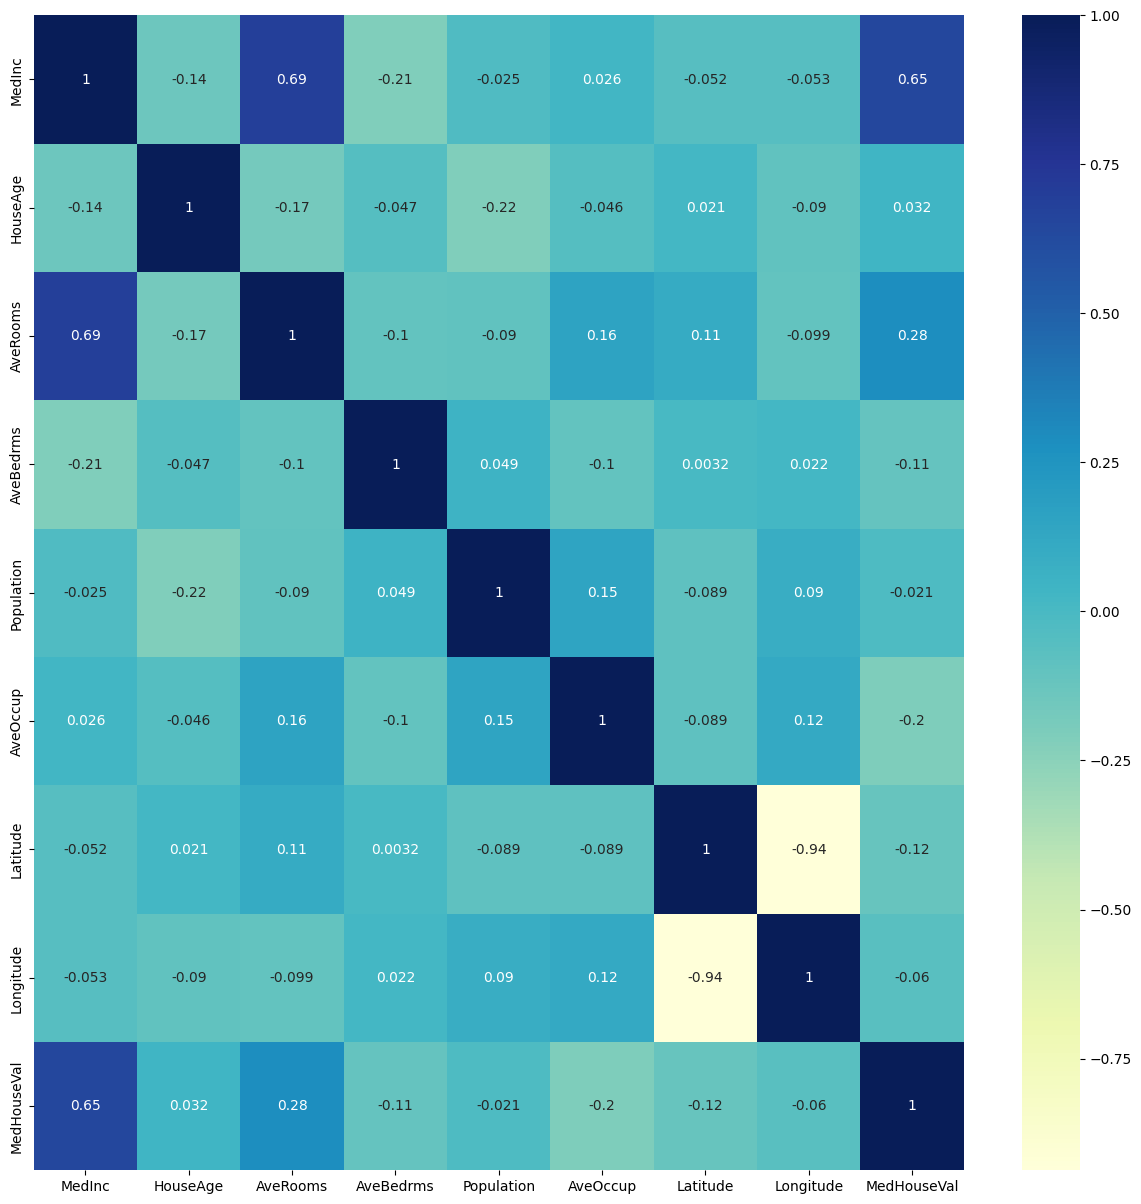

In [15]:
plt.figure(figsize= (15, 15))
sns.heatmap(train.corr(), annot = True,cmap="YlGnBu")

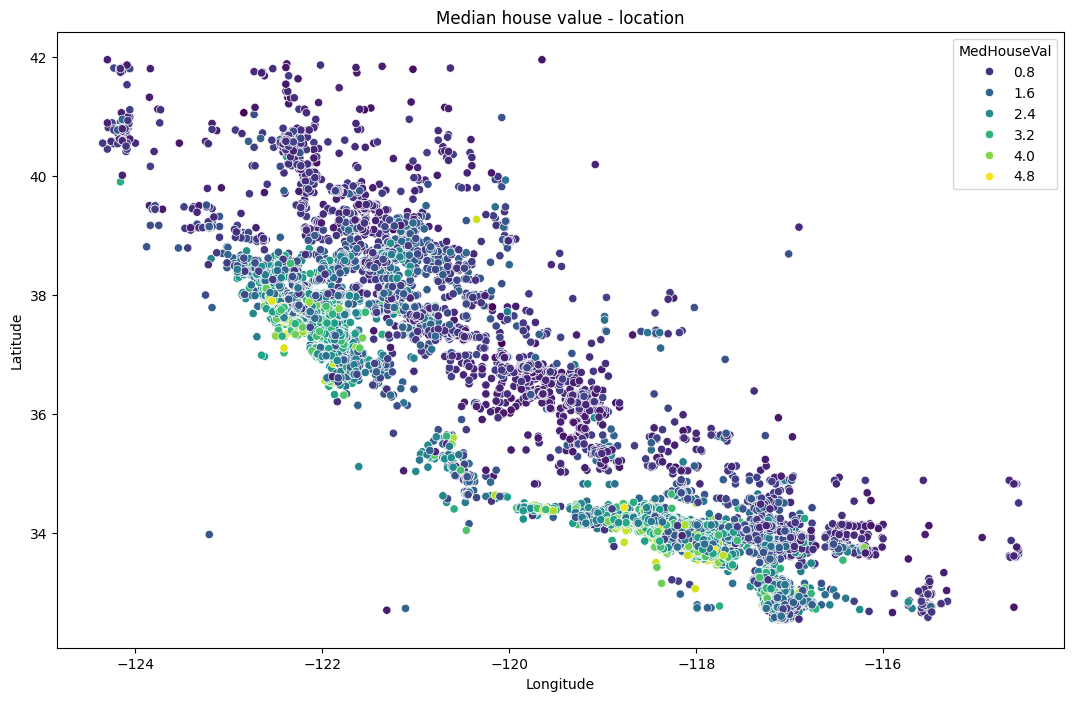

In [16]:
plt.figure(figsize=(13,8))
sns.scatterplot(data = train, x = "Longitude", y = "Latitude",hue = "MedHouseVal", palette = "viridis")
plt.title("Median house value - location")
plt.show()

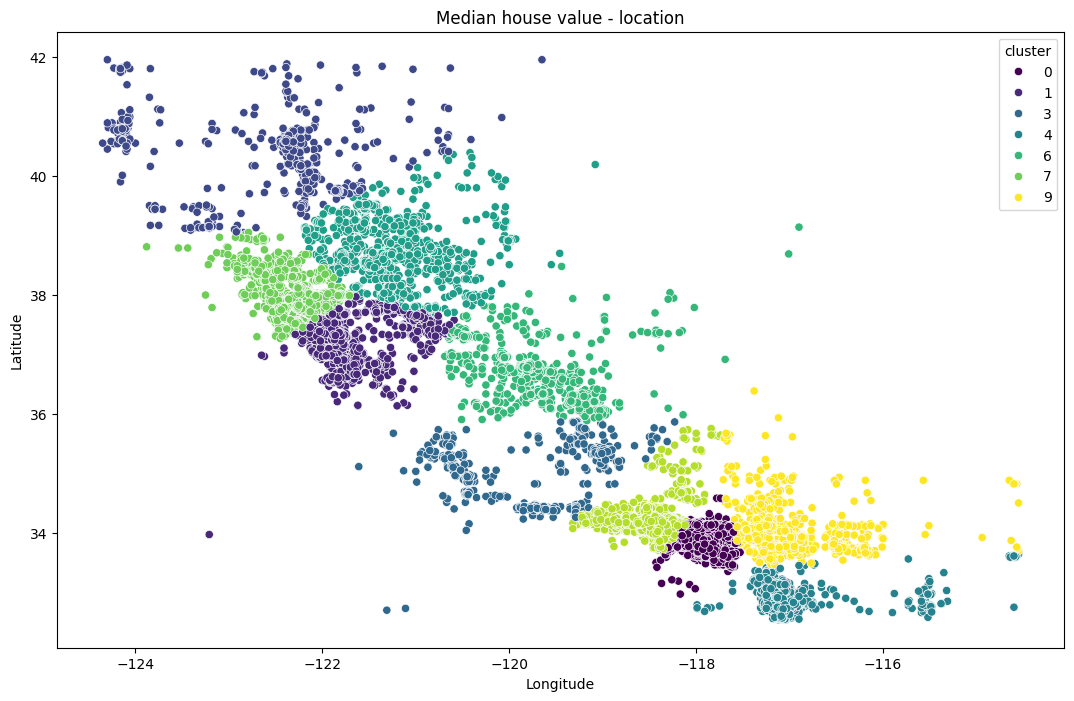

In [17]:
from sklearn.cluster import KMeans
kmeans =  KMeans(n_clusters=10).fit(train.iloc[:,6:8])
train['cluster'] = kmeans.labels_
kmeans =  KMeans(n_clusters=10).fit(test.iloc[:,6:8])
test['cluster'] = kmeans.labels_
plt.figure(figsize=(13,8))
sns.scatterplot(data = train, x = "Longitude", y = "Latitude",hue = "cluster", palette = "viridis")
plt.title("Median house value - location")
plt.show()

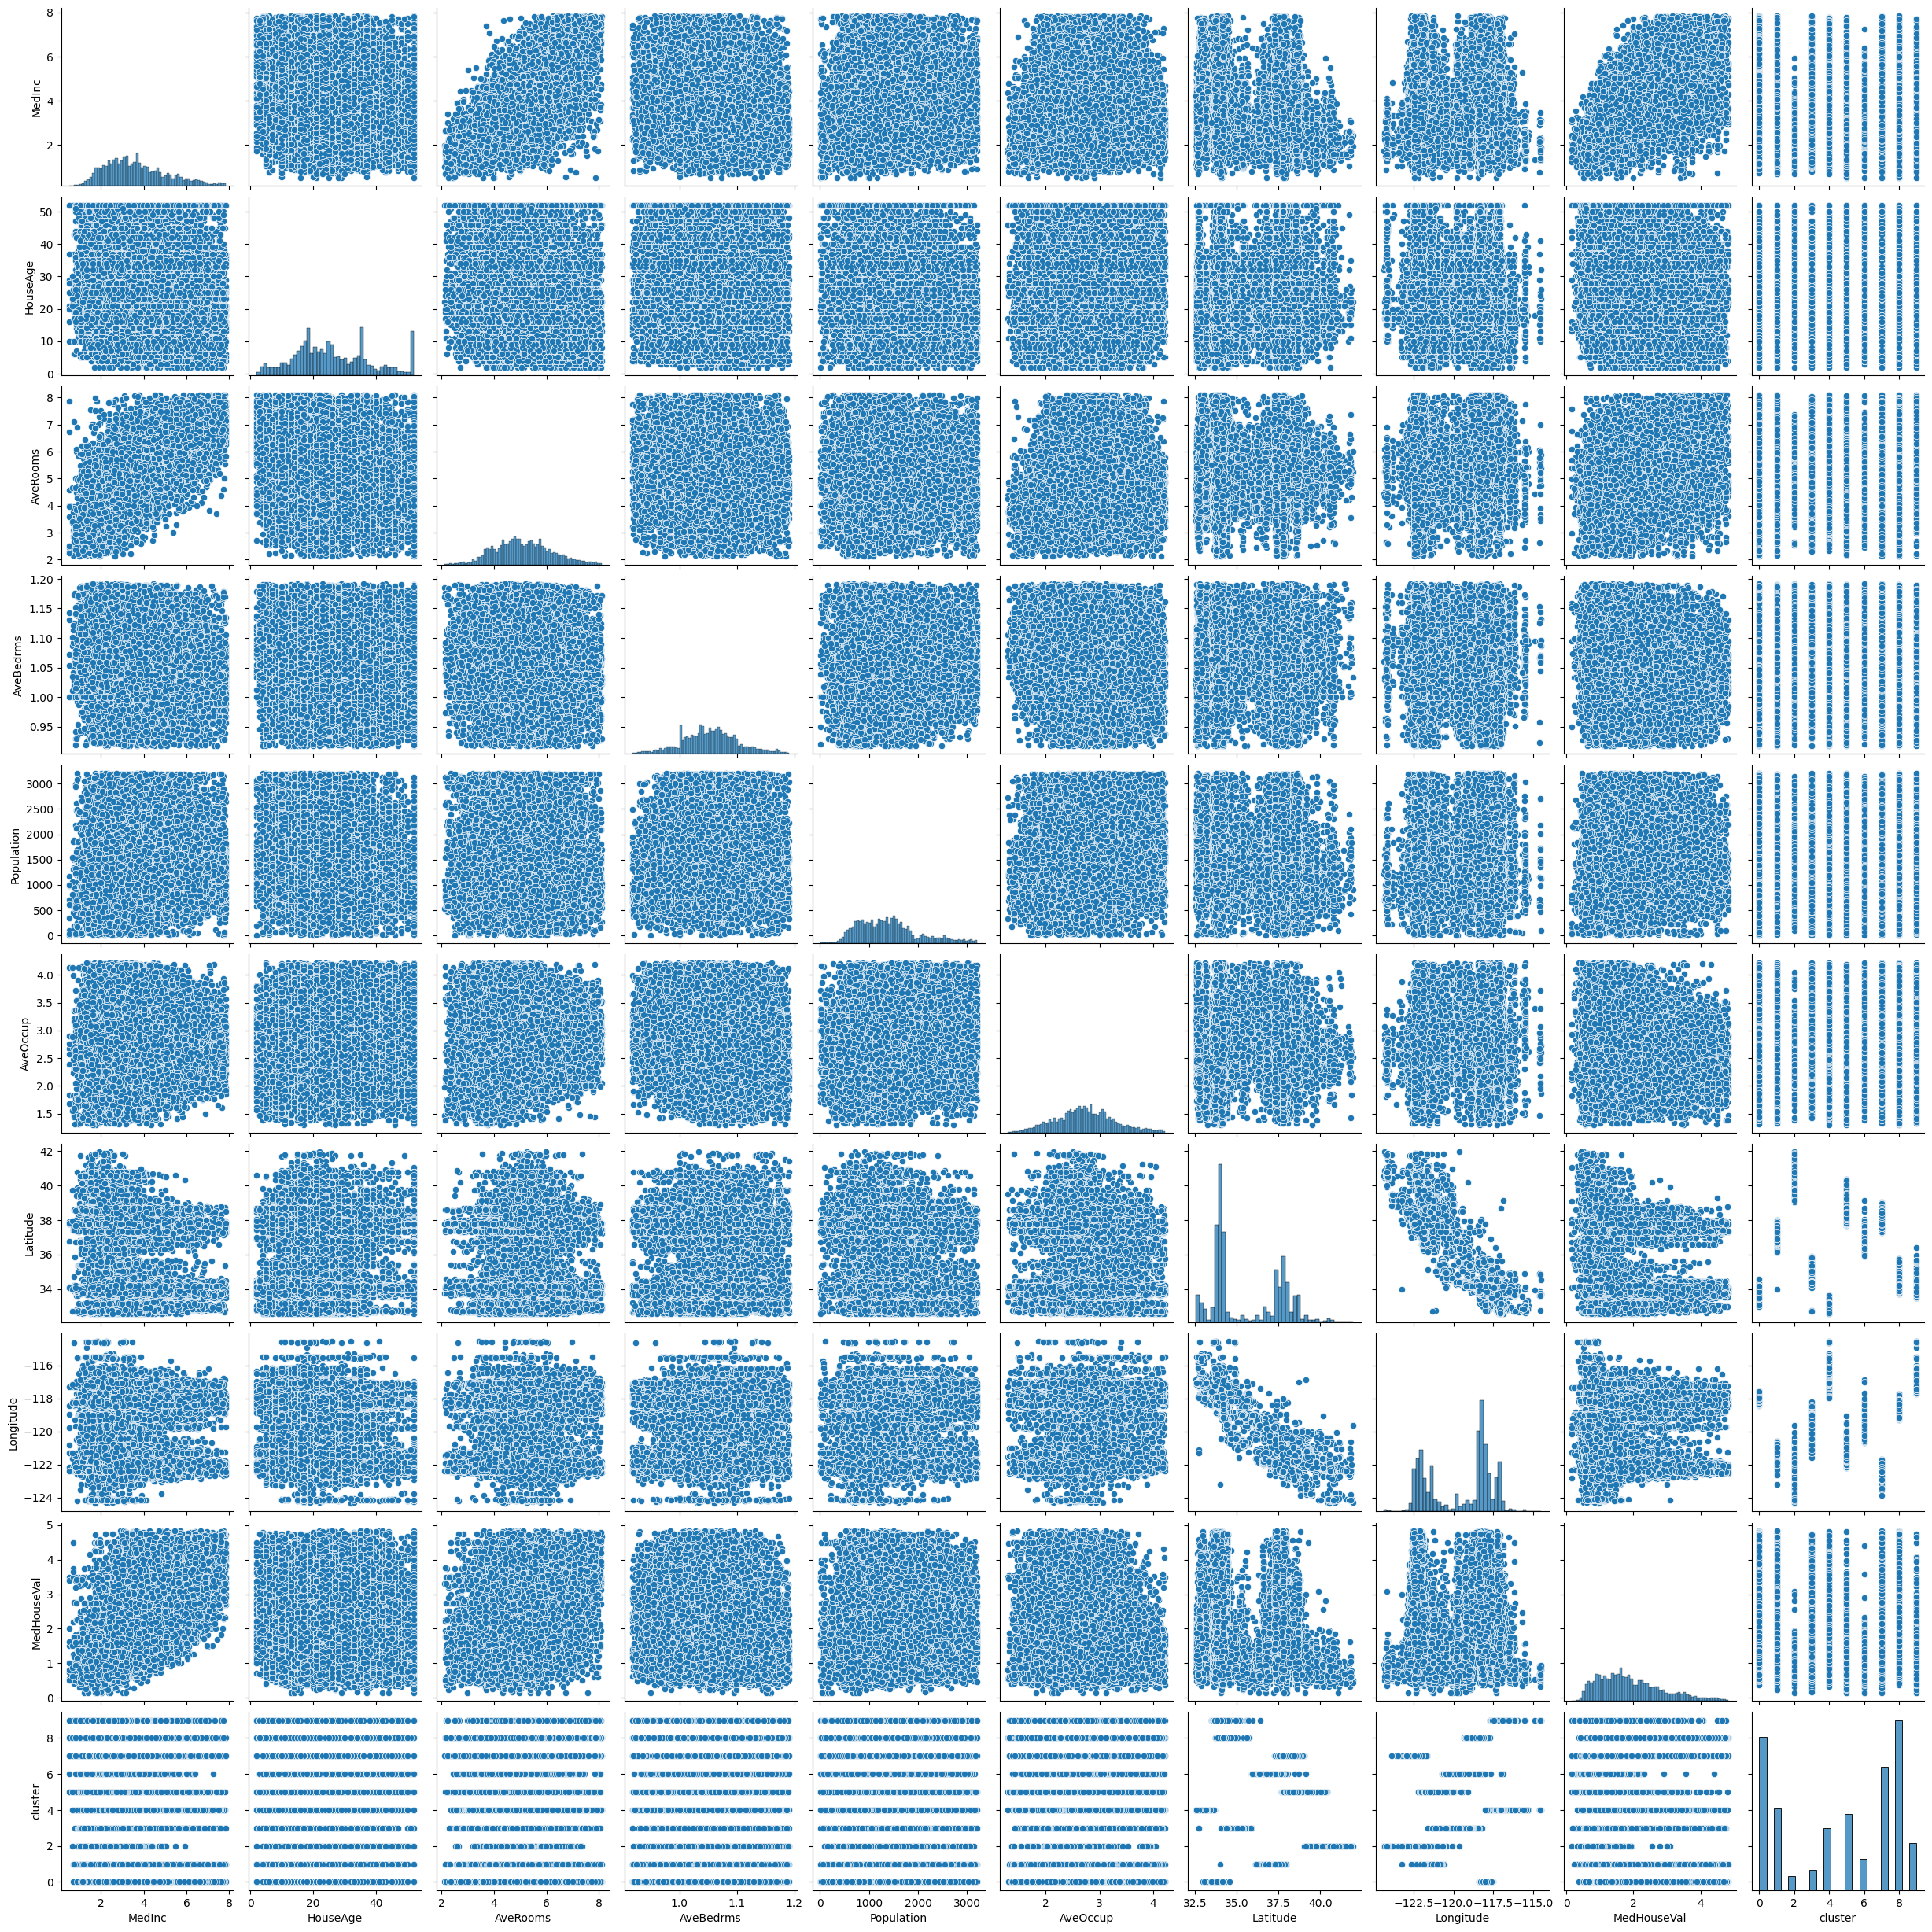

In [19]:
sns.pairplot(train)

In [32]:
for i in train:
    if i == "Latitude":
        break
    X = MS([i,"MedHouseVal"]).fit_transform(train)
    model = sm.OLS(train[i],train["MedHouseVal"])
    res = model.fit()
    print(summarize(res),i)
    

               coef  std err        t  P>|t|
MedHouseVal  1.6719    0.003  512.496    0.0 MedInc
               coef  std err        t  P>|t|
MedHouseVal  9.8182    0.037  268.973    0.0 HouseAge
               coef  std err        t  P>|t|
MedHouseVal  1.9851    0.005  378.796    0.0 AveRooms
               coef  std err        t  P>|t|
MedHouseVal  0.3884    0.001  335.357    0.0 AveBedrms
                 coef  std err        t  P>|t|
MedHouseVal  599.1838    3.391  176.714    0.0 Population
               coef  std err        t  P>|t|
MedHouseVal  1.0122    0.007  150.556    0.0 AveOccup
                coef  std err      t  P>|t|
MedHouseVal  13.0029    0.038  338.1    0.0 Latitude


In [26]:
train.isnull().sum()

MedInc         1161
HouseAge          0
AveRooms        565
AveBedrms      1609
Population     2502
AveOccup       1400
Latitude          0
Longitude         0
MedHouseVal    1998
cluster           0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = train.drop(['MedHouseVal'],1)
y =train['MedHouseVal']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

C:\Users\shuga\AppData\Local\Temp\ipykernel_7052\1058523071.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop(['MedHouseVal'],1)


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
clf = CatBoostRegressor()
clf.fit(X_train, y_train, verbose=False)
preds = clf.predict(X_test.values)
print(mean_squared_error(y_test, preds, squared=False))

0.5651349041135845
